In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 1s 0us/step


In [ ]:
!ls

sample_data


In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


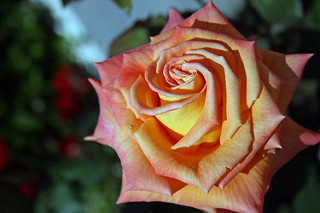

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

In [ ]:
list(data_dir.glob('roses/*'))

[PosixPath('/root/.keras/datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2332478138_28f1d586e4_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4413509121_a62879598a.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/1775233884_12ff5a124f.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3265902330_d8b1

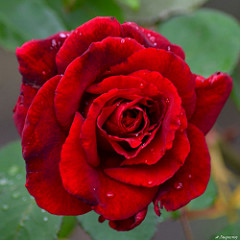

In [ ]:
PIL.Image.open(str(roses[6]))

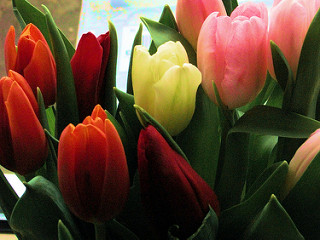

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
for fname in os.listdir('/root/.keras/datasets/flower_photos/tulips'):
  print(fname)

4312181724_16dab26afb_n.jpg
4550805310_5f81c9ba08_n.jpg
12764617214_12211c6a0c_m.jpg
15090146325_b7e1249e60.jpg
17012955700_7141d29eee.jpg
7166564830_8b34a3fd35_n.jpg
142235017_07816937c6.jpg
14487943607_651e8062a1_m.jpg
3213012716_b4c0f7db88.jpg
16594995743_ce72c61201_n.jpg
9870557734_88eb3b9e3b_n.jpg
8713389178_66bceb71a8_n.jpg
7205145492_baec4dbb94.jpg
13539827514_79b60b6c22_n.jpg
466409031_4c10294db5_m.jpg
17167151059_a53bfe0b02.jpg
2432389721_4d14971060_n.jpg
2336919121_851ebc4754.jpg
13979840624_28466cb3ec_n.jpg
5719416820_3060e3c1f0.jpg
7447655334_e8f805ab95_m.jpg
113960470_38fab8f2fb_m.jpg
65347450_53658c63bd_n.jpg
14054827391_139fb54432.jpg
16098264209_38fe491093.jpg
8622237974_b362574785_n.jpg
391477275_7c2f50a1a7_m.jpg
3529889389_ab4cb6c43b.jpg
4565139594_b28d260cb9.jpg
16732302779_8aa56f255d_n.jpg
8713398906_28e59a225a_n.jpg
8562853756_73778dac25_n.jpg
14094114202_4c1d7f1116.jpg
7775145448_c42e638a6a_n.jpg
9019694597_2d3bbedb17.jpg
12916017805_1cde91a891_n.jpg
14116780333_7

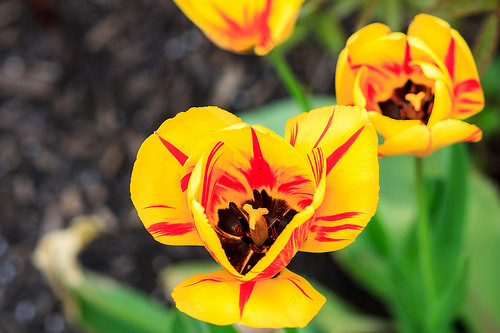

In [ ]:
image_1 = load_img('/root/.keras/datasets/flower_photos/tulips/14078067903_92f5eb27ff.jpg')
image_1

In [ ]:
batch_size = 64
epochs = 5
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

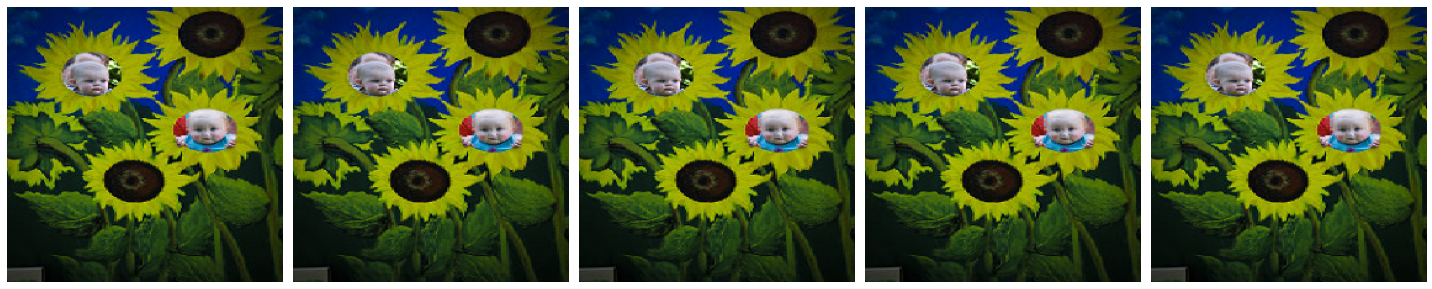

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
sample_train_images, label =next(train_data_gen)

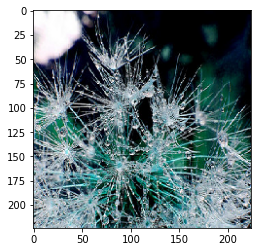

In [ ]:
plt.imshow(sample_train_images[3])

In [ ]:
label[3]

array([0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(5,activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_data_gen,
                             validation_data=val_data_gen,
                             epochs=15)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
46/46 [==============================] - 74s 692ms/step - loss: 1.1966 - accuracy: 0.5631 - val_loss: 0.6563 - val_accuracy: 0.7688
Epoch 2/15
46/46 [==============================] - 16s 348ms/step - loss: 0.3906 - accuracy: 0.8690 - val_loss: 0.6337 - val_accuracy: 0.7688
Epoch 3/15
46/46 [==============================] - 16s 355ms/step - loss: 0.2171 - accuracy: 0.9370 - val_loss: 0.5330 - val_accuracy: 0.8098
Epoch 4/15
46/46 [==============================] - 16s 350ms/step - loss: 0.1214 - accuracy: 0.9814 - val_loss: 0.5306 - val_accuracy: 0.8194
Epoch 5/15
46/46 [==============================] - 16s 345ms/step - loss: 0.0897 - accuracy: 0.9935 - val_loss: 0.5258 - val_accuracy: 0.8222
Epoch 6/15
46/46 [==============================] - 16s 346ms/step - loss: 0.0624 - accuracy: 0.9984 - val_loss: 0.5200 - val_accuracy: 0.8263
Epoch 7/15
46/46 [==============================] - 16s 347ms/step - loss: 0.0506 - accuracy: 0.9993 - val_loss: 0.5219 - val_accuracy: 0.8235

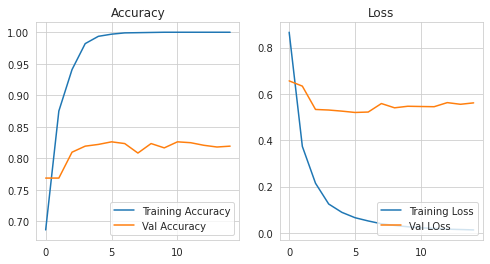

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='lower right')
plt.title('Loss')
plt.show()

In [ ]:
tf.keras.models.save_model(model,"Sanket_my_flower.hdf5")

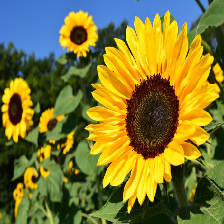

In [ ]:
image_1 = load_img('sun.jpg', target_size=(224,224))
image_1

In [ ]:
data_1 = img_to_array(image_1)
img_test = data_1.reshape(1,224,224,3)

In [ ]:
pred = model.predict(img_test)

In [ ]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(pred)

0

In [ ]:
classes = ['daisy','dandelion','roses','sunflowers','tulips']

In [ ]:
classes[np.argmax(pred)]

'daisy'

In [ ]:
print(classes[(np.argmax(pred))])

tulips


In [ ]:
/content/sample_data